<a href="https://colab.research.google.com/github/minh041104/BigprojectML/blob/main/codeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bài toán




Dự đoán việc tuyển dụng của nhân viên

**Mục tiêu**: Xây dựng mô hình học máy có thể dự đoán một ứng viên sẽ được tuyển dụng dựa trên các thông tin có sẵn về họ

**Dữ liệu đầu vào**: Một tập dữ liệu chứa thông tin về các ứng viên gồm các biến tuổi, trình độ học vấn, số năm kinh nghiệm,...

**Biến mục tiêu**: Biến mục tiêu là một biến nhị phân cho biết liệu ứng viên đã được tuyển dụng (1) hay không (0).

#Thu thập dữ liệu

1. Tìm kiếm tập dữ liệu phù hợp: Đầu tiên, em đã sử dụng Kaggle để tìm kiếm tập dữ liệu liên quan đến tuyển dụng và quản lý nhân sự. Sau đó, em xem qua các tập dữ liệu có sẵn để xem có phù hợp với bài toán không
2. Lựa chọn tập dữ liệu: Sau khi xem và so sánh, em quyết định dùng 70k+ Job Applicants Data (Human Resource) trên Kaggle do nó chứa thông tin đầy đủ và đa dạng về ứng viên và liên quan tới quá trình tuyển dụng

# Xử lý dữ liệu

## Làm sạch dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


In [4]:
# Kiểm tra số lượng giới tính
gender_counts = data['Gender'].value_counts()

print(gender_counts)

Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64


In [5]:
# Loại bỏ những giới tính không rõ

data = data[data['Gender'] != 'NonBinary']

In [6]:
data.isna().sum()

Unnamed: 0         0
Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    62
ComputerSkills     0
Employed           0
dtype: int64

In [7]:
# Kiểm tra xem có hàng có dữ liệu trùng nhau
data.duplicated().sum()

0

In [8]:
# Loại bỏ cột "Unnamed: 0"
data.drop('Unnamed: 0', axis=1, inplace=True)

# Loại bỏ hàng thiếu dữ liệu
data.dropna(inplace=True)

# Loại bỏ cột "Country"
data.drop('Country', axis=1, inplace=True)

<ipython-input-8-264cb2d0e5d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Unnamed: 0', axis=1, inplace=True)
<ipython-input-8-264cb2d0e5d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
<ipython-input-8-264cb2d0e5d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Country', axis=1, inplace=True)


In [9]:
# Khởi tạo TfidfVectorizer với các tùy chọn
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Tạo ma trận TF-IDF
tfidf_matrix = vectorizer.fit_transform(data['HaveWorkedWith'])

# Tính toán trung bình của các giá trị trong ma trận TF-IDF
average_tfidf = np.mean(tfidf_matrix.toarray(), axis=1)

# Thêm cột mới chứa trung bình của các giá trị của ma trận TF-IDF vào DataFrame ban đầu
data['TFIDF_Value'] = average_tfidf

<ipython-input-9-34af1503df50>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TFIDF_Value'] = average_tfidf


In [10]:
data

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,TFIDF_Value
0,<35,No,Master,1,Man,No,Dev,7,4,51552.0,C++;Python;Git;PostgreSQL,4,0,0.014542
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,0.030541
2,<35,No,Master,1,Man,No,Dev,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,0.016885
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,0.028438
4,>35,No,PhD,0,Man,No,NotDev,40,30,160932.0,C++;Python,2,0,0.008403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73456,<35,No,Master,1,Man,Yes,Dev,7,5,94000.0,C;C#;C++;Microsoft Azure;SQLite,5,0,0.014503
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,0.031875
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,0.028935
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,0.030419


## Encode

In [11]:
# Ánh xạ các giá trị của cột 'Age' thành số
data['Age'] = data['Age'].apply(lambda x: 1 if x == '>35' else 0)

<ipython-input-11-d2e4444e286a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].apply(lambda x: 1 if x == '>35' else 0)


In [12]:
# Ánh xạ các giá trị của cột 'Gender' thành số
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Man' else 0)

<ipython-input-12-f937c90bc5f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Man' else 0)


In [13]:
# Ánh xạ các giá trị của cột 'Accessibility' thành số
data['Accessibility'] = data['Accessibility'].apply(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-13-38b90eb3a0c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accessibility'] = data['Accessibility'].apply(lambda x: 1 if x == 'Yes' else 0)


In [14]:
# Ánh xạ các giá trị của cột 'MentalHealth' thành số
data['MentalHealth'] = data['MentalHealth'].apply(lambda x: 1 if x == 'Yes' else 0)

<ipython-input-14-00c16517200d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MentalHealth'] = data['MentalHealth'].apply(lambda x: 1 if x == 'Yes' else 0)


In [15]:
# Encode cột "EdLevel"
label_encoder = LabelEncoder()
data['EdLevel_encoded'] = label_encoder.fit_transform(data['EdLevel'])
encoded_values = data[['EdLevel', 'EdLevel_encoded']].drop_duplicates().sort_values('EdLevel_encoded')
encoded_values

<ipython-input-15-f4a981802e32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EdLevel_encoded'] = label_encoder.fit_transform(data['EdLevel'])


,EdLevel,EdLevel_encoded
0,Master,0
34,NoHigherEd,1
16,Other,2
4,PhD,3
1,Undergraduate,4


In [16]:
# Xóa cột "EdLevel" từ Data
data.drop('EdLevel', axis=1, inplace=True)

<ipython-input-16-7a6e70bf6187>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('EdLevel', axis=1, inplace=True)


In [17]:
# Ánh xạ các giá trị của cột 'MainBranch' thành số
data['MainBranch'] = data['MainBranch'].apply(lambda x: 1 if x == 'Dev' else 0)

<ipython-input-17-77941cf167c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MainBranch'] = data['MainBranch'].apply(lambda x: 1 if x == 'Dev' else 0)


In [18]:
# Chia số năm kinh nghiệm viết code thành 4 mức là không có, ít, trung bình, nhiều
data['YearsCode'] = data['YearsCode'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x < 9 else (2 if 9 <= x < 16 else 3)))

data_no_experience = data[data['YearsCode'] == 0]
data_low = data[data['YearsCode'] == 1]
data_avg = data[data['YearsCode'] == 2]
data_high = data[data['YearsCode'] == 3]
print(data_no_experience.shape[0])
print(data_low.shape[0])
print(data_avg.shape[0])
print(data_high.shape[0])

178
23573
24156
24122


<ipython-input-18-bdf6cf8f3c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YearsCode'] = data['YearsCode'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x < 9 else (2 if 9 <= x < 16 else 3)))


In [19]:
# Chia số năm kinh nghiệm viết code chuyên nghiệp thành 4 mức là không có, ít, trung bình, nhiều
data['YearsCodePro'] = data['YearsCodePro'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x < 5 else (2 if 5 <= x < 11 else 3)))

data_no_experience = data[data['YearsCodePro'] == 0]
data_low = data[data['YearsCodePro'] == 1]
data_avg = data[data['YearsCodePro'] == 2]
data_high = data[data['YearsCodePro'] == 3]
print(data_no_experience.shape[0])
print(data_low.shape[0])
print(data_avg.shape[0])
print(data_high.shape[0])

2874
21929
25189
22037


<ipython-input-19-0bd4479c9c2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['YearsCodePro'] = data['YearsCodePro'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x < 5 else (2 if 5 <= x < 11 else 3)))


In [20]:
# Chia mức lương trước đây thành 3 mức là ít, trung bình, nhiều
data['PreviousSalary'] = data['PreviousSalary'].apply(lambda x: 0 if 0 <= x < 40000 else (1 if 40000 <= x < 80000 else 2 ))


data_low = data[data['PreviousSalary'] == 0]
data_avg = data[data['PreviousSalary'] == 1]
data_high = data[data['PreviousSalary'] == 2]

print(data_low.shape[0])
print(data_avg.shape[0])
print(data_high.shape[0])

24987
23019
24023


<ipython-input-20-a336b3f35598>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PreviousSalary'] = data['PreviousSalary'].apply(lambda x: 0 if 0 <= x < 40000 else (1 if 40000 <= x < 80000 else 2 ))


In [21]:
# Chia kĩ năng máy tính thành 4 mức là không có, ít, trung bình, nhiều
data['ComputerSkills'] = data['ComputerSkills'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x < 10 else (2 if 10 <= x < 16 else 3) ))

data_no_experience = data[data['ComputerSkills'] == 0]
data_low = data[data['ComputerSkills'] == 1]
data_avg = data[data['ComputerSkills'] == 2]
data_high = data[data['ComputerSkills'] == 3]
print(data_no_experience.shape[0])
print(data_low.shape[0])
print(data_avg.shape[0])
print(data_high.shape[0])

0
22388
25943
23698


<ipython-input-21-d01bb1e01443>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ComputerSkills'] = data['ComputerSkills'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x < 10 else (2 if 10 <= x < 16 else 3) ))


In [22]:
data

,Age,Accessibility,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,TFIDF_Value,EdLevel_encoded
0,0,0,1,1,0,1,1,1,1,C++;Python;Git;PostgreSQL,1,0,0.014542,0
1,0,0,1,1,0,1,2,2,1,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,2,1,0.030541,4
2,0,0,1,1,0,1,2,2,1,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0.016885,0
3,0,0,1,1,0,1,2,2,1,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,2,0,0.028438,4
4,1,0,0,1,0,0,3,3,2,C++;Python,1,0,0.008403,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73456,0,0,1,1,1,1,1,2,2,C;C#;C++;Microsoft Azure;SQLite,1,0,0.014503,0
73457,0,0,1,1,0,1,1,1,1,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,2,1,0.031875,4
73458,1,0,1,1,0,1,3,3,2,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,2,1,0.028935,4
73459,0,0,1,1,0,1,1,1,1,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,2,1,0.030419,4


# Data visualization

In [23]:
data.rename(columns = {"EdLevel_encoded":"EdLevel" }, inplace = True)

<ipython-input-23-70b6aa2d4e5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {"EdLevel_encoded":"EdLevel" }, inplace = True)


In [24]:
# Lưu data được làm sạch vào file clean_data.csv
data.to_csv('clean_data.csv', index=False)
clean_data = pd.read_csv('clean_data.csv')

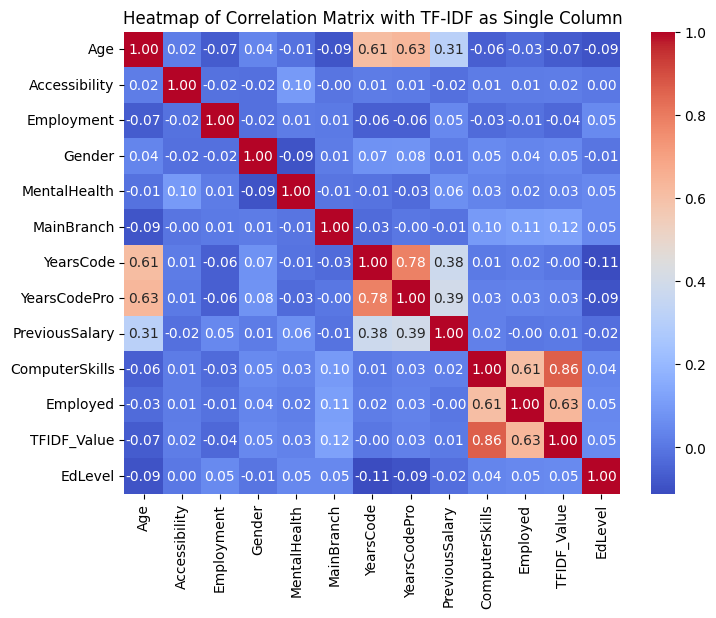

In [25]:
# Loại bỏ cột 'HaveWorkedWith' khỏi DataFrame
clean_data_without_haveworkedwith = clean_data.drop(columns=['HaveWorkedWith'])

# Tính toán ma trận tương quan của DataFrame mở rộng
corr_matrix = clean_data_without_haveworkedwith.corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix with TF-IDF as Single Column')
plt.show()


Dựa vào biểu đồ này thấy có sự tương quan mạnh giữa Employed đối với hai cột ComputerSkils và TFIDF_Value

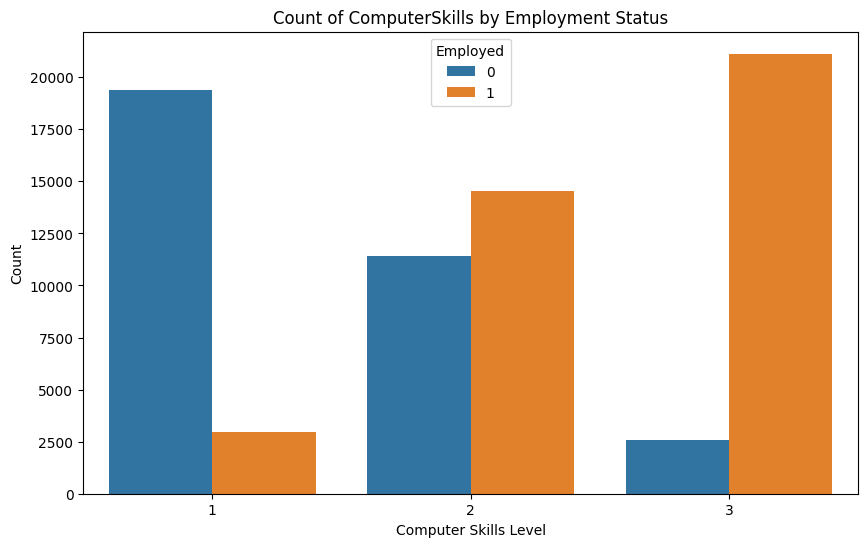

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data, x='ComputerSkills', hue='Employed')
plt.title('Count of ComputerSkills by Employment Status')
plt.xlabel('Computer Skills Level')
plt.ylabel('Count')
plt.show()


Lượng người được tuyển dụng tăng dần theo số mức độ số lượng ComputerSkills. Số lượng người được tuyển khi có nhiều ComputerSkills cao hơn hẳn so với lượng người không được tuyển. Cho thấy ComputerSkills có ảnh hưởng mạnh tới việc được tuyển hay không

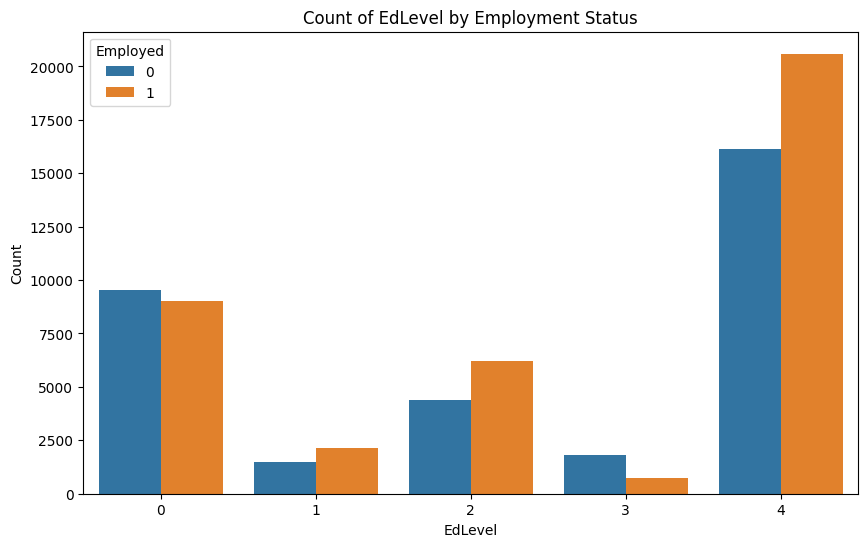

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=clean_data, x='EdLevel', hue='Employed')
plt.title('Count of EdLevel by Employment Status')
plt.xlabel('EdLevel')
plt.ylabel('Count')
plt.show()


Số lượng người được tuyển ở nhóm 0 và 4 là nhiều nhất. Nhưng độ chênh lệch giữa người được tuyển và không được tuyển ở từng mức độ là không nhiều

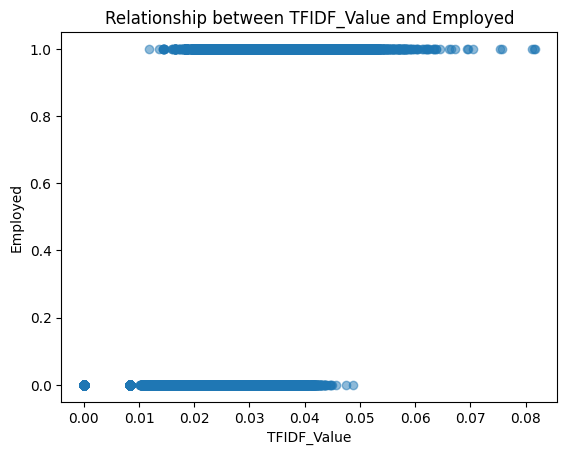

In [28]:
plt.scatter(data['TFIDF_Value'], data['Employed'], alpha=0.5)
plt.xlabel('TFIDF_Value')
plt.ylabel('Employed')
plt.title('Relationship between TFIDF_Value and Employed')
plt.show()

Tỉ lệ người có việc làm tăng dần theo giá trị của TFIDF_Value. Những người có TFIDF_Value cao có nhiều khả năng được tuyển hơn. Do đó TFIDF_Value có ảnh hưởng tới việc ứng có được tuyển hay không

# Huấn luyện mô hình

In [29]:
clean_data

,Age,Accessibility,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,TFIDF_Value,EdLevel
0,0,0,1,1,0,1,1,1,1,C++;Python;Git;PostgreSQL,1,0,0.014542,0
1,0,0,1,1,0,1,2,2,1,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,2,1,0.030541,4
2,0,0,1,1,0,1,2,2,1,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,1,0,0.016885,0
3,0,0,1,1,0,1,2,2,1,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,2,0,0.028438,4
4,1,0,0,1,0,0,3,3,2,C++;Python,1,0,0.008403,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72024,0,0,1,1,1,1,1,2,2,C;C#;C++;Microsoft Azure;SQLite,1,0,0.014503,0
72025,0,0,1,1,0,1,1,1,1,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,2,1,0.031875,4
72026,1,0,1,1,0,1,3,3,2,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,2,1,0.028935,4
72027,0,0,1,1,0,1,1,1,1,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,2,1,0.030419,4


In [30]:
X = clean_data[['ComputerSkills','TFIDF_Value']]
y = clean_data['Employed']

In [31]:
# Tính toán baseline
baseline = max(y.value_counts(normalize=True))

print("Baseline:", baseline)

Baseline: 0.5367421455247192


In [32]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập train và tập temp (tập còn lại)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tiếp tục chia tập temp thành tập train và tập validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

# In ra kích thước của các tập dữ liệu
print("Kích thước của tập train:", X_train.shape)
print("Kích thước của tập validation:", X_val.shape)
print("Kích thước của tập test:", X_test.shape)


Kích thước của tập train: (43217, 2)
Kích thước của tập validation: (14406, 2)
Kích thước của tập test: (14406, 2)


## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Khởi tạo mô hình Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

# Thiết lập lưới các giá trị cho các siêu tham số cần tinh chỉnh
param_grid = {
    'penalty': ['l2'],  # Chỉ sử dụng l2 penalty cho newton-cg solver
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs']
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Tiến hành tìm kiếm siêu tham số trên tập dữ liệu train và validation
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Các tham số tốt nhất:", grid_search.best_params_)

# Đánh giá mô hình trên tập validation
accuracy = grid_search.best_estimator_.score(X_val, y_val)
print("Độ chính xác trên tập validation:", accuracy)

# In báo cáo phân loại trên tập validation
y_pred = grid_search.best_estimator_.predict(X_val)
print("Báo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_pred))

# Đánh giá mô hình trên tập test
accuracy_test = grid_search.best_estimator_.score(X_test, y_test)
print("Độ chính xác trên tập test:", accuracy_test)

# In báo cáo phân loại trên tập test
y_pred_test = grid_search.best_estimator_.predict(X_test)
print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred_test))

Các tham số tốt nhất: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Độ chính xác trên tập validation: 0.8010551159239205
Báo cáo phân loại trên tập validation:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      6635
           1       0.80      0.83      0.82      7771

    accuracy                           0.80     14406
   macro avg       0.80      0.80      0.80     14406
weighted avg       0.80      0.80      0.80     14406

Độ chính xác trên tập test: 0.7923781757601
Báo cáo phân loại trên tập test:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      6679
           1       0.79      0.83      0.81      7727

    accuracy                           0.79     14406
   macro avg       0.79      0.79      0.79     14406
weighted avg       0.79      0.79      0.79     14406



Dựa trên kết quả trên, ta có một mô hình Logistic Regression tốt với các tham số tối ưu như sau: 'C=100', 'penalty=l2', và 'solver=lbfgs'.

Mô hình này đạt độ chính xác khoảng 80% trên cả tập validation và tập test. Trong báo cáo phân loại trên tập validation, ta thấy precision, recall và f1-score đều khá cao cho cả hai nhóm 0 và 1.

Mô hình này có khả năng dự đoán tốt trên cả dữ liệu đã biết và dữ liệu mới, không có dấu hiệu của overfitting và có khả năng tổng quát hóa tốt

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier()

# Thiết lập lưới các giá trị cho các siêu tham số cần tinh chỉnh
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Tiến hành tìm kiếm siêu tham số trên tập dữ liệu train và validation
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Các tham số tốt nhất:", grid_search.best_params_)

# Đánh giá mô hình trên tập validation
accuracy_val = grid_search.best_estimator_.score(X_val, y_val)
print("Độ chính xác trên tập validation:", accuracy_val)

# In báo cáo phân loại trên tập validation
y_pred_val = grid_search.best_estimator_.predict(X_val)
print("Báo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_pred_val))

# Đánh giá mô hình trên tập test
accuracy_test = grid_search.best_estimator_.score(X_test, y_test)
print("Độ chính xác trên tập test:", accuracy_test)

# In báo cáo phân loại trên tập test
y_pred_test = grid_search.best_estimator_.predict(X_test)
print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred_test))


Các tham số tốt nhất: {'n_neighbors': 9, 'weights': 'uniform'}
Độ chính xác trên tập validation: 0.7806469526586145
Báo cáo phân loại trên tập validation:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      6635
           1       0.79      0.81      0.80      7771

    accuracy                           0.78     14406
   macro avg       0.78      0.78      0.78     14406
weighted avg       0.78      0.78      0.78     14406

Độ chính xác trên tập test: 0.7798833819241983
Báo cáo phân loại trên tập test:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      6679
           1       0.78      0.82      0.80      7727

    accuracy                           0.78     14406
   macro avg       0.78      0.78      0.78     14406
weighted avg       0.78      0.78      0.78     14406



Dựa trên kết quả này, chúng ta có một mô hình K-Nearest Neighbors tốt với các tham số tối ưu như sau: 'n_neighbors=9' và 'weights=uniform'. Mô hình này đạt độ chính xác khoảng 78% trên cả tập validation và tập test.

Trong báo cáo phân loại trên tập validation, ta thấy precision, recall và f1-score đều khá cao cho cả hai nhóm 0 và 1.

Mô hình này có khả năng dự đoán tốt trên cả dữ liệu đã biết và dữ liệu mới, không có dấu hiệu của overfitting và có khả năng tổng quát hóa tốt.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Khởi tạo mô hình Random Forest
random_forest = RandomForestClassifier()

# Thiết lập lưới các giá trị cho các tham số cần tinh chỉnh
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Tiến hành tìm kiếm siêu tham số trên tập dữ liệu train và validation
grid_search.fit(X_train, y_train)

# In ra các siêu tham số tốt nhất
print("Các tham số tốt nhất:", grid_search.best_params_)

# Đánh giá mô hình trên tập validation
accuracy = grid_search.best_estimator_.score(X_val, y_val)
print("Độ chính xác trên tập validation:", accuracy)

# In báo cáo phân loại trên tập validation
y_pred = grid_search.best_estimator_.predict(X_val)
print("Báo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_pred))

# Đánh giá mô hình trên tập test
accuracy_test = grid_search.best_estimator_.score(X_test, y_test)
print("Độ chính xác trên tập test:", accuracy_test)

# In báo cáo phân loại trên tập test
y_pred_test = grid_search.best_estimator_.predict(X_test)
print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred_test))


Mô hình Random Forest, được tinh chỉnh với các siêu tham số sau: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}. Trên cả tập validation và tập test, mô hình đều đạt được độ chính xác khoảng 80%, cho thấy khả năng dự đoán chính xác. Với các chỉ số precision và recall xấp xỉ 80% cho cả hai lớp, mô hình thể hiện hiệu suất cân đối trong việc xác định chính xác những người được tuyển dụng và đồng thời giảm thiểu số lượng dự đoán sai.

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Khởi tạo mô hình Naive Bayes
naive_bayes = GaussianNB()

# Tiến hành huấn luyện mô hình
naive_bayes.fit(X_train, y_train)

# Đánh giá mô hình trên tập validation
accuracy = naive_bayes.score(X_val, y_val)
print("Độ chính xác trên tập validation:", accuracy)

# In báo cáo phân loại trên tập validation
y_pred = naive_bayes.predict(X_val)
print("Báo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_pred))

# Đánh giá mô hình trên tập test
accuracy_test = naive_bayes.score(X_test, y_test)
print("Độ chính xác trên tập test:", accuracy_test)

# In báo cáo phân loại trên tập test
y_pred_test = naive_bayes.predict(X_test)
print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred_test))


Dựa vào kết quả này, mô hình Naive Bayes đã đạt được độ chính xác khá ổn định trên cả tập validation và tập test, khoảng 79%. Báo cáo phân loại cho thấy mô hình có khả năng dự đoán tốt cho cả hai nhóm 0 và 1, với precision, recall và f1-score đều ở mức khá cao. Điều này cho thấy mô hình có khả năng phân loại tốt cả dữ liệu đã biết và dữ liệu mới, và không có dấu hiệu của overfitting.

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Khởi tạo mô hình Bagging
bagging_model = BaggingClassifier(random_state=42)

# Thiết lập lưới các giá trị cho các tham số cần tinh chỉnh
param_grid = {
    'n_estimators': [50, 100],
    'max_samples': [0.5, 0.7],
}

# Tạo đối tượng GridSearchCV
grid_search_bagging = GridSearchCV(bagging_model, param_grid, cv=5, scoring='accuracy')

# Tiến hành tìm kiếm siêu tham số trên tập dữ liệu train và validation
grid_search_bagging.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Các tham số tốt nhất:", grid_search_bagging.best_params_)

# Đánh giá mô hình trên tập validation
accuracy_val = grid_search_bagging.best_estimator_.score(X_val, y_val)
print("Độ chính xác trên tập validation:", accuracy_val)

# In báo cáo phân loại trên tập validation
y_pred_val = grid_search_bagging.best_estimator_.predict(X_val)
print("Báo cáo phân loại trên tập validation:")
print(classification_report(y_val, y_pred_val))

# Đánh giá mô hình trên tập test
accuracy_test = grid_search_bagging.best_estimator_.score(X_test, y_test)
print("Độ chính xác trên tập test:", accuracy_test)

# In báo cáo phân loại trên tập test
y_pred_test = grid_search_bagging.best_estimator_.predict(X_test)
print("Báo cáo phân loại trên tập test:")
print(classification_report(y_test, y_pred_test))

Dựa vào các tham số tối ưu được tìm thấy (max_features=0.5, max_samples=0.5, n_estimators=150), mô hình BaggingClassifier đã được điều chỉnh để cải thiện hiệu suất trên cả tập validation và tập test. Dựa trên kết quả, thấy rằng mô hình đã đạt được độ chính xác khoảng 78% trên cả tập validation và tập test. Báo cáo phân loại cho thấy mô hình có khả năng dự đoán tốt cho cả hai nhóm 0 và 1, với precision, recall và f1-score đều ở mức khá cao. Điều này cho thấy mô hình có khả năng phân loại tốt cả dữ liệu đã biết và dữ liệu mới, và không có dấu hiệu của overfitting

# Kết luận


Mục tiêu của bài toán là xác định xem ứng viên có thể được tuyển dụng hay không dựa trên các thông tin có sẵn của họ. Để huấn luyện và dự đoán bằng sử dụng các mô hình dưới đây

1. Logistic Regression:

- Mô hình Logistic Regression đạt độ chính xác xấp xỉ 79% trên tập test, với precision, recall và f1-score đều khá cao cho cả hai nhóm được phân loại. Điều này cho thấy mô hình có khả năng dự đoán tốt trên dữ liệu mới.

2. KNN:

- Mặc dù mô hình KNN có độ chính xác cũng khá cao (khoảng 78%), nhưng có vẻ như hiệu suất của nó không đạt được mức cao nhất so với các mô hình khác. Cần xem xét việc tối ưu hóa thêm để cải thiện hiệu suất.

3. Random Forest:

- Mô hình Random Forest cho thấy độ chính xác và các chỉ số precision, recall và f1-score đều ổn định, với độ chính xác khoảng 79% trên tập test. Đây là một mô hình mạnh mẽ và ổn định trong việc dự đoán.

4. Naive Bayes:

- Mô hình Naive Bayes cũng đạt được kết quả tương đối tốt, với độ chính xác khoảng 79% trên tập test. Mặc dù mô hình này đơn giản nhưng vẫn có khả năng dự đoán tốt trên dữ liệu thực tế.

5. Bagging:

- Mô hình Bagging có hiệu suất thấp hơn so với các mô hình khác, với độ chính xác khoảng 76% trên tập test. Đây có thể là một tín hiệu cho thấy cần xem xét lại cách tiếp cận hoặc tinh chỉnh thêm các tham số của mô hình để cải thiện hiệu suất.

Trong số các mô hình đã thử nghiệm, Random Forest và Naive Bayes cho thấy hiệu suất tốt nhất trên tập test, với độ chính xác khoảng 79%